In [76]:
#Create Custom Portfolio

In [77]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [78]:
otex_path = Path("../Pandas Classes/otex_historical.csv")
l_path = Path("../Pandas Classes/l_historical.csv")
shop_path = Path("../Pandas Classes/shop_historical.csv")

# Read in data
otex = pd.read_csv(otex_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
l = pd.read_csv(l_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
shop = pd.read_csv(shop_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [83]:
# Reform Data

In [84]:
otex

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


In [85]:
otex = otex.drop(columns= ['Symbol'])

In [88]:
otex.columns = ['OTEX']

In [89]:
otex.head()

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [90]:
l = l.drop(columns= ['Symbol'])

In [92]:
l.columns = ['L']

In [93]:
l.head()

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [94]:
shop = shop.drop(columns= ['Symbol'])

In [95]:
shop.columns = ['SHOP']

In [96]:
shop.head()

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [97]:
combined_data = pd.concat([otex, l, shop], axis ='columns', join= 'inner')
combined_data

,OTEX,L,SHOP
Date,,,
2018-01-02,43.58,57.99,132.06
2018-01-03,43.07,57.41,135.15
2018-01-04,42.91,57.42,137.46
2018-01-05,42.57,57.42,137.26
2018-01-08,42.16,56.86,139.51
...,...,...,...
2019-12-20,58.68,67.90,513.22
2019-12-23,57.89,67.68,511.62
2019-12-24,57.44,67.67,525.39


In [98]:
# Calculate daily returns

# Drop NAs

# Display sample data

In [101]:
daily_returns = combined_data.pct_change().dropna().copy()

In [102]:
daily_returns

,OTEX,L,SHOP
Date,,,
2018-01-03,-0.011703,-0.010002,0.023398
2018-01-04,-0.003715,0.000174,0.017092
2018-01-05,-0.007924,0.000000,-0.001455
2018-01-08,-0.009631,-0.009753,0.016392
2018-01-09,-0.000712,0.008969,-0.011254
...,...,...,...
2019-12-20,0.024441,0.003547,-0.005503
2019-12-23,-0.013463,-0.003240,-0.003118
2019-12-24,-0.007773,-0.000148,0.026915


In [103]:
# Set weights
weights = [1/3, 1/3, 1/3]

In [104]:
# Calculate portfolio return

# Display sample data

In [105]:
portfolio_returns = daily_returns.dot(weights)
portfolio_returns

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Length: 500, dtype: float64

<AxesSubplot:xlabel='Date'>

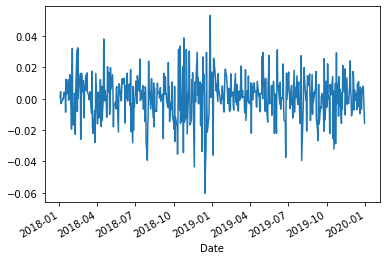

In [106]:
portfolio_returns.plot()

In [107]:
# Join your returns DataFrame to the original returns DataFrame
# Only compare dates where return data exists for all the stocks (drop NaNs)

In [108]:
daily_returns

,OTEX,L,SHOP
Date,,,
2018-01-03,-0.011703,-0.010002,0.023398
2018-01-04,-0.003715,0.000174,0.017092
2018-01-05,-0.007924,0.000000,-0.001455
2018-01-08,-0.009631,-0.009753,0.016392
2018-01-09,-0.000712,0.008969,-0.011254
...,...,...,...
2019-12-20,0.024441,0.003547,-0.005503
2019-12-23,-0.013463,-0.003240,-0.003118
2019-12-24,-0.007773,-0.000148,0.026915


In [110]:
print(f'Already cleared the NaNs in the beginning.')

Already cleared the NaNs in the beginning.


In [111]:
# Calculate the annualized `std`

In [112]:
daily_returns.std() * np.sqrt(252)

OTEX    0.215132
L       0.152369
SHOP    0.488717
dtype: float64

In [113]:
# Calculate rolling standard deviation

# Plot rolling standard deviation

In [115]:
daily_returns.rolling(window=21).std().dropna().copy()

,OTEX,L,SHOP
Date,,,
2018-01-31,0.005697,0.009422,0.019085
2018-02-01,0.028489,0.009874,0.019344
2018-02-02,0.030516,0.009932,0.019206
2018-02-05,0.030508,0.009921,0.021719
2018-02-06,0.030546,0.009767,0.021984
...,...,...,...
2019-12-20,0.009358,0.007647,0.023773
2019-12-23,0.009868,0.007651,0.023754
2019-12-24,0.009104,0.007416,0.024038


<AxesSubplot:xlabel='Date'>

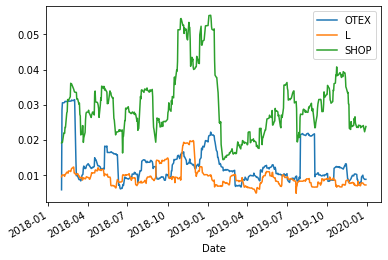

In [116]:
daily_returns.rolling(window=21).std().dropna().copy().plot()

In [117]:
# Calculate and plot the correlation

In [118]:
import seaborn as sns 

In [119]:
correlation = daily_returns.corr()
correlation

,OTEX,L,SHOP
OTEX,1.000000,0.181266,0.398427
L,0.181266,1.000000,0.127501
SHOP,0.398427,0.127501,1.000000


<AxesSubplot:>

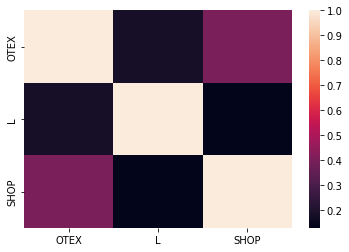

In [120]:
sns.heatmap(correlation) 

In [121]:
#Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX
#First get back all my S&P 60 TSX data back
#Second get the variance
#Third get the covariance
#Fourth get the beta
#Finally Plot 

In [122]:
sp_tsx_path = Path("../Pandas Classes/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_path, parse_dates=True, infer_datetime_format=True)

In [123]:
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace(",","")
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace("$","")
sp_tsx_history['Close'] = sp_tsx_history['Close'].astype(float)

/var/folders/9d/rpnbdqqj51b4yqlrbmn011640000gn/T/ipykernel_23653/1775792936.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace("$","")


In [126]:
sp_tsx_history['Date'] = pd.to_datetime(sp_tsx_history.Date).dt.date

In [127]:
sp_tsx_returns = sp_tsx_history.set_index('Date')

In [128]:
sp_tsx_returns = sp_tsx_returns.pct_change().dropna().copy()


In [129]:
sp_tsx_returns.rename(columns = {'Close' : 'S&P TSX'}, inplace = True)

In [130]:
sp_tsx_returns

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [132]:
variance = sp_tsx_returns['S&P TSX'].rolling(window=60).var()
variance

Date
2012-10-02         NaN
2012-10-03         NaN
2012-10-04         NaN
2012-10-05         NaN
2012-10-09         NaN
                ...   
2019-12-20    0.000014
2019-12-23    0.000013
2019-12-24    0.000013
2019-12-27    0.000010
2019-12-30    0.000009
Name: S&P TSX, Length: 1817, dtype: float64

In [134]:
covariance = daily_returns['L'].rolling(window=60).cov(sp_tsx_returns['S&P TSX'])
covariance

Date
2012-10-02         NaN
2012-10-03         NaN
2012-10-04         NaN
2012-10-05         NaN
2012-10-09         NaN
                ...   
2019-12-20    0.000006
2019-12-23    0.000006
2019-12-24    0.000007
2019-12-27    0.000005
2019-12-30    0.000006
Length: 1817, dtype: float64

In [135]:
l_beta = (covariance / variance)
l_beta

Date
2012-10-02         NaN
2012-10-03         NaN
2012-10-04         NaN
2012-10-05         NaN
2012-10-09         NaN
                ...   
2019-12-20    0.444886
2019-12-23    0.446120
2019-12-24    0.488277
2019-12-27    0.470677
2019-12-30    0.605556
Length: 1817, dtype: float64

<AxesSubplot:xlabel='Date'>

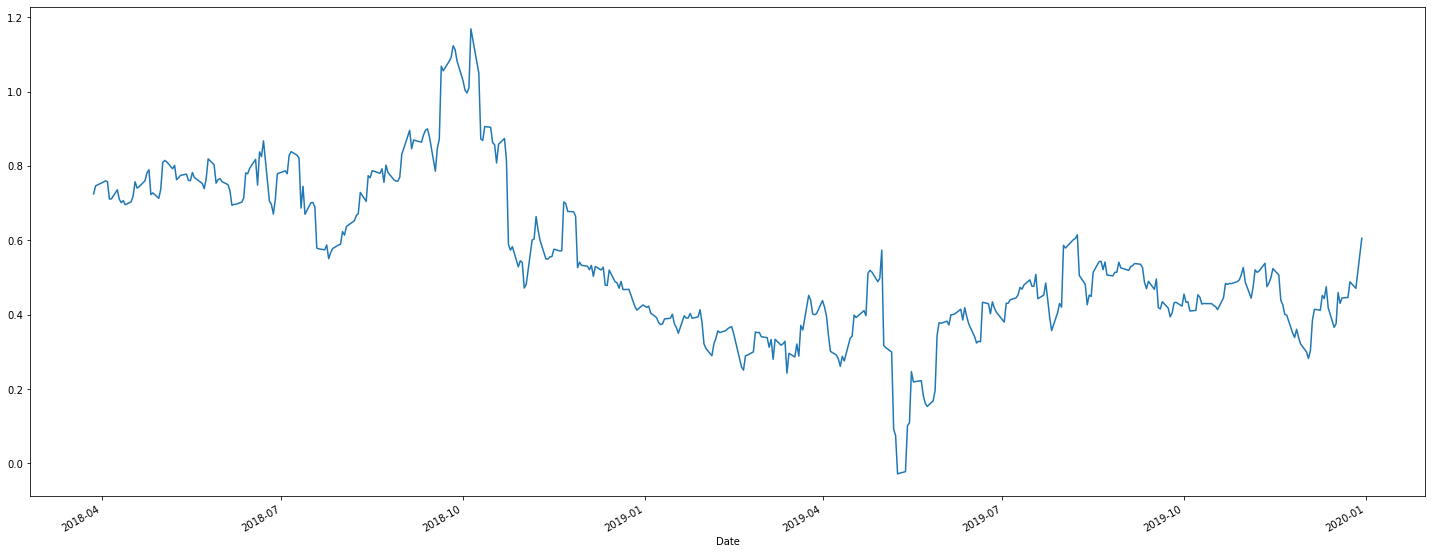

In [136]:
l_beta.plot(figsize=(25,10))

In [137]:
# Calculate Annualized Sharpe Ratios
# Visualize the sharpe ratios as a bar plot

In [138]:
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

OTEX    0.743512
L       0.570084
SHOP    1.655513
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

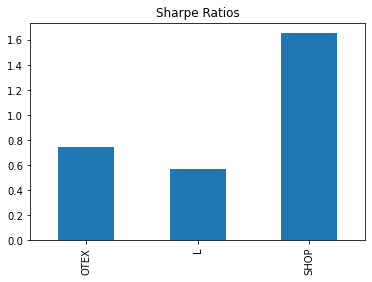

In [139]:
sharpe_ratios.plot(kind='bar', title= 'Sharpe Ratios')

In [141]:
print(f'Based off of the whale portfolios and the market, all three of my portfolios do much better. But when compared to the algorithms from part 1, my three portfolios do better than algo 2 but not better than algo 1.')

Based off of the whale portfolios and the market, all three of my portfolios do much better. But when compared to the algorithms from part 1, my three portfolios do better than algo 2 but not better than algo 1.
